In [8]:
import scipy as scp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("../data/data.csv")

In [3]:
gene_list = open("../data/geneset.txt").read().splitlines()

In [13]:
# select genes from database from inputted gene list 
df_selected=df[df['gene_id'].isin(gene_list)]
df_selected = df_selected.set_index('gene_id')
#df_selected=df_selected.astype('float16')
df_selected.info()
#Log Scale the selected data
df_selected = (1+df_selected)/2 # (-1,1] -> (0,1]
df_selected=np.log(df_selected)

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, BAD to NEFL
Columns: 290 entries, CASE-NEUAA599TMX to CTRL-NEUZL045YD3
dtypes: float64(290)
memory usage: 120.5+ KB


In [15]:
df_selected=df_selected.reset_index()

In [16]:
df_selected_melt=df_selected.melt(id_vars='gene_id')
df_selected_melt.rename(columns = {"variable": "Participant_ID","value":"TPM","gene_id":"Gene_ID"}, 
          inplace = True)

In [17]:
df_selected_melt

,Gene_ID,Participant_ID,TPM
0,BAD,CASE-NEUAA599TMX,1.219488
1,ALS2,CASE-NEUAA599TMX,0.873841
2,BID,CASE-NEUAA599TMX,0.108928
3,TNFRSF1B,CASE-NEUAA599TMX,-0.680832
4,MAP2K3,CASE-NEUAA599TMX,0.108336
...,...,...,...
15365,PPP3R1,CTRL-NEUZL045YD3,3.775471
15366,TNF,CTRL-NEUZL045YD3,-0.691357
15367,GPX1,CTRL-NEUZL045YD3,1.459665
15368,GRIN2B,CTRL-NEUZL045YD3,1.857426


## Covariates

In [14]:
covariates=pd.read_csv("../data/covariates.csv")

In [21]:
df_selected_melt=pd.merge(df_selected_melt, covariates, on='Participant_ID')

## Plotly

In [26]:
fig = px.box(df_selected_melt, x="Gene_ID",y="TPM",color="Race")
fig.show()

## Seaborn

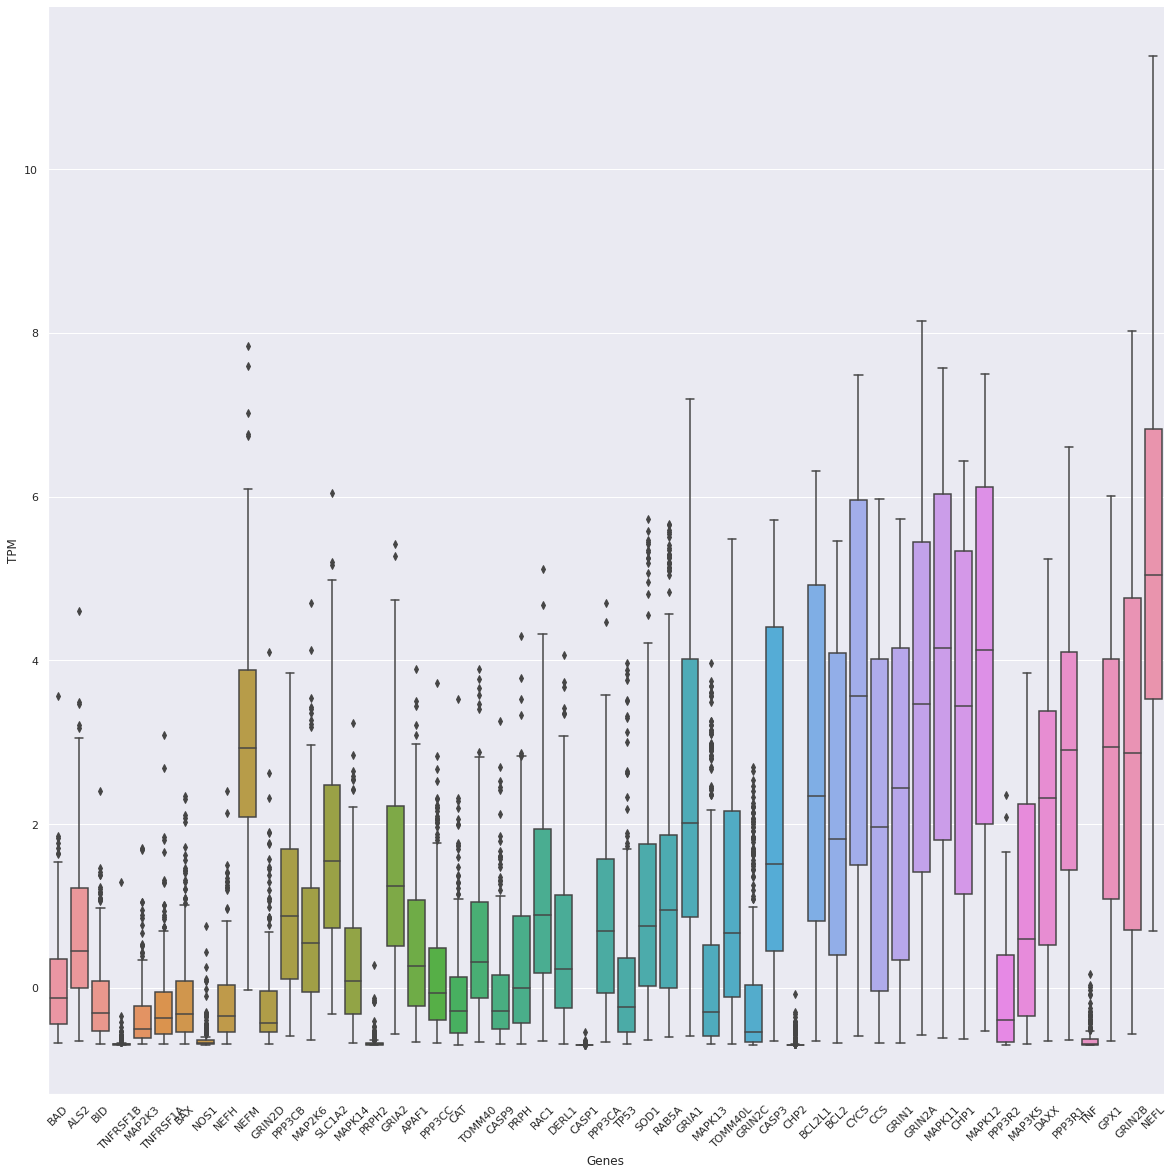

In [62]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(20,20)})
ax = sns.boxplot(x="Gene_ID",y="TPM", data=df_selected_melt)
ax.set_xlabel("Genes")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.despine()
#plt.savefig('/content/gdrive/MyDrive/HLA_analysis/Figures/d1_cpu.png',bbox_inches ="tight",dpi=300)